# Heart Disease Prediction using Random Forest Classifier model

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use Random Forest (classification) algorithm.

##Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc  

##Load data

In [2]:
#Upload the data from your computer
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
#Reading the data
df = pd.read_csv("heart.csv")
#First 10 rows of our data 
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Data contains:**
* age: The person's age in years

* sex: The person's sex (1 = male, 0 = female)

* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

* chol: The person's cholesterol measurement in mg/dl

* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

* thalach: The person's maximum heart rate achieved

* exang: Exercise induced angina (1 = yes; 0 = no)

* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

* ca: The number of major vessels (0-3)

* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

* target: Heart disease (0 = no, 1 = yes)

In [5]:
df.shape

(303, 14)

In [6]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 
              'thalassemia', 'target']

In [7]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

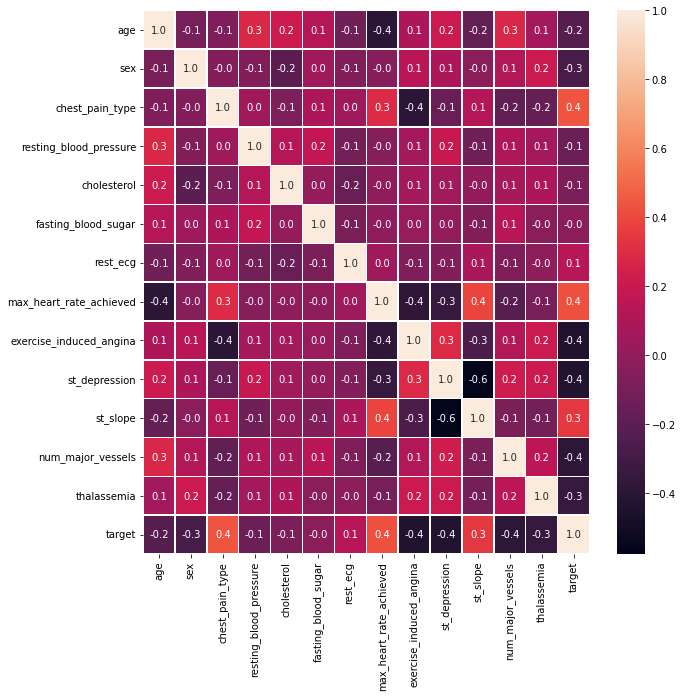

In [8]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

##Data Exploration

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

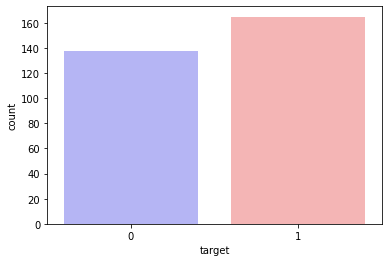

In [10]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

* 1 -> have disease

* 0 -> no disease

In [12]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


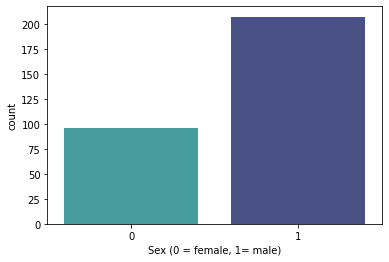

In [13]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [14]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [15]:
df.groupby('target').mean()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


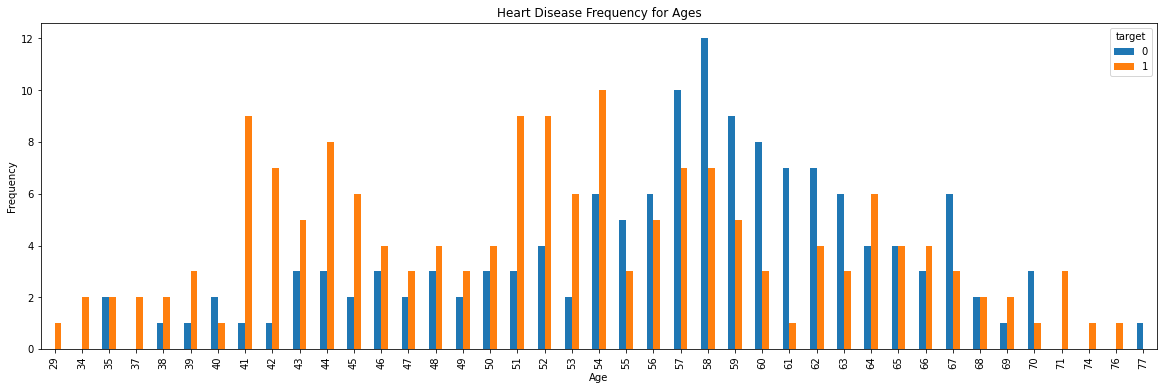

In [16]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')

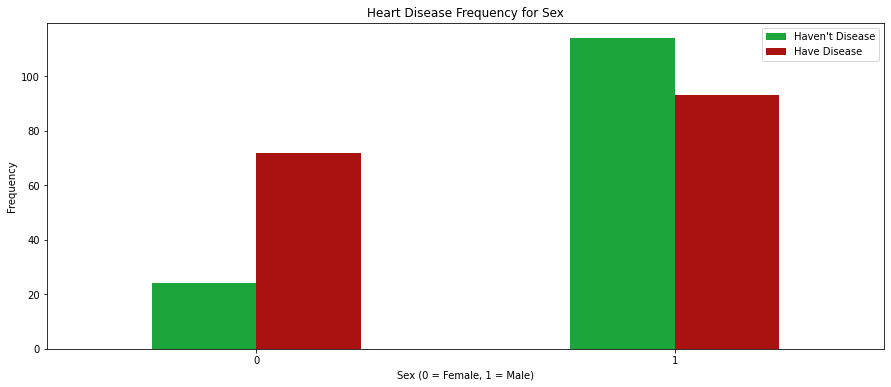

In [17]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

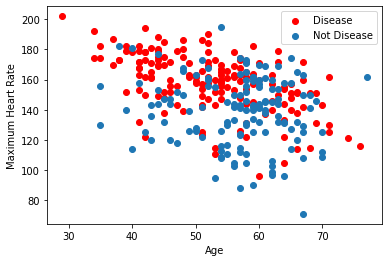

In [18]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate_achieved[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

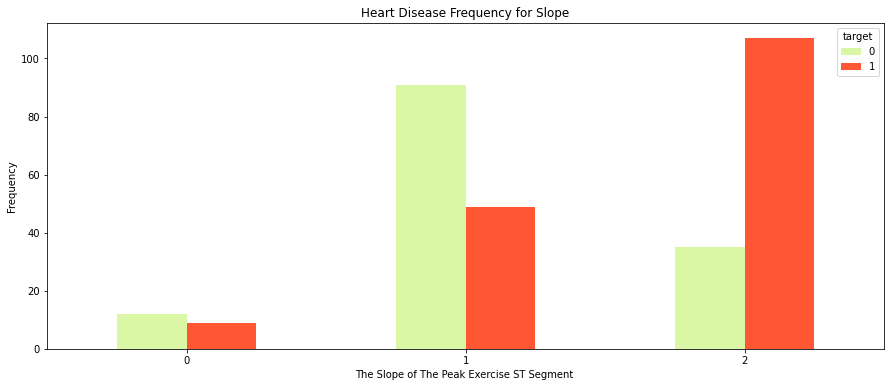

In [19]:
pd.crosstab(df.st_slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

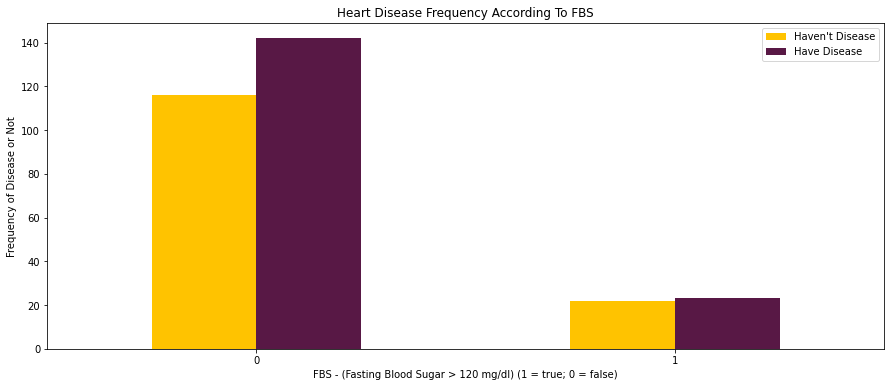

In [20]:
pd.crosstab(df.fasting_blood_sugar,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

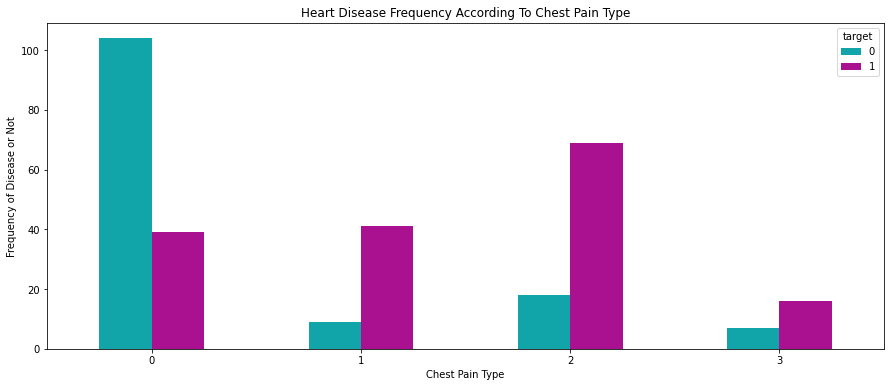

In [21]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

##Splitting the features and target

In [22]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [23]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [24]:
print(X)

     age  sex  chest_pain_type  ...  st_slope  num_major_vessels  thalassemia
0     63    1                3  ...         0                  0            1
1     37    1                2  ...         0                  0            2
2     41    0                1  ...         2                  0            2
3     56    1                1  ...         2                  0            2
4     57    0                0  ...         2                  0            2
..   ...  ...              ...  ...       ...                ...          ...
298   57    0                0  ...         1                  0            3
299   45    1                3  ...         1                  0            3
300   68    1                0  ...         1                  2            3
301   57    1                0  ...         1                  1            3
302   57    0                1  ...         1                  1            2

[303 rows x 13 columns]


In [25]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


##Splitting the data into Training data and Test Data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state=42) 

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [28]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Training model

In [116]:
#Use the model Random Forest Classifier with hypermarameter - best optimization
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=200, min_samples_split = 25, 
                            max_leaf_nodes = 500, min_samples_leaf = 3,
                               n_estimators= 500, max_features = 2)

Using hyperparameters to optimize model performance with the best value:

* bootstrap = True: method for sampling data points (with or without replacement)    

* max_depth = 70: max number of levels in each decision tree

* max_features = 'auto': max number of features considered for splitting a node   

* min_samples_leaf = 4: min number of data points allowed in a leaf node

* min_samples_split = 10: min number of data points placed in a node before the node is split

* n_estimators= 400: number of trees in the forest



In [117]:
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=200, max_features=2, max_leaf_nodes=500,
                       min_samples_leaf=3, min_samples_split=25,
                       n_estimators=500)

In [118]:
Y_predict = model.predict(X_test)

In [119]:
confusion_matrix(Y_test, Y_predict)

array([[18, 10],
       [ 1, 32]])

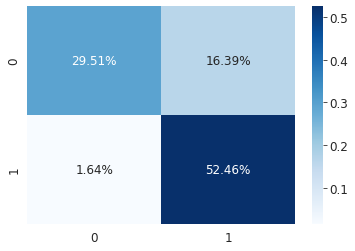

In [120]:
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()

In [121]:
ac = accuracy_score(Y_test,Y_predict)
print('Random Forest Classifier Accuracy Score on Confusion_matrix: ',ac*100,'%')

Random Forest Classifier Accuracy Score on Confusion_matrix:  81.9672131147541 %


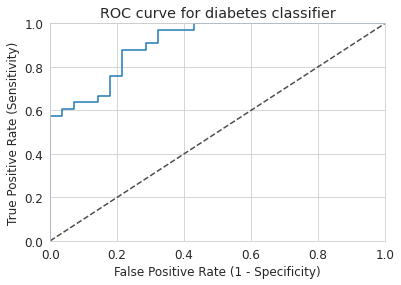

In [76]:
Y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [77]:
auc1 = auc(fpr, tpr)
print('Random Forest Classifier Accuracy Score on ROC curve: ',auc1*100,'%')

Random Forest Classifier Accuracy Score on ROC curve:  90.9090909090909 %


In [126]:
# Random Forest Classification - test hyperparameter
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=200, min_samples_split = 25, 
                            max_leaf_nodes = 500, min_samples_leaf = 3,
                               n_estimators= 500, max_features = 2)
rf.fit(X_train, Y_train)

acc = rf.score(X_test,Y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Test Accuracy MAX Score : {:.2f}%".format(acc))

Random Forest Algorithm Test Accuracy MAX Score : 85.25%


In [122]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [8, 10, 20, 25]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200, None], 'min_samples_split': [8, 10, 20, 25], 'min_samples_leaf': [3, 4, 5], 'bootstrap': [True, False]}


##Testing a predictive system

In [37]:
input_data = (38,1,0,119,250,0,0,186,0,1.5,1,0,3)

#change the input_data to a numpy array
input_data_new = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshape = input_data_new.reshape(1, -1)

prediction = model.predict(input_data_reshape)

print(prediction)

[0]


In [38]:
#Test the first of the row data in table heart disease (input_data = (64,1,3,110,211,0,0,144,1,1.8,1,0,2)) - heart.csv
if (prediction[0] == 0):
  print("The person doesn't have a Heart Disease.")
else:
  print('The person has a Heart Disease.')

The person doesn't have a Heart Disease.


In [39]:
#Test the second of the row data in table heart disease (input_data = (64,1,0,120,246,0,0,96,1,2.2,0,1,2)) - heart.csv
if (prediction[0] == 0):
  print("The person doesn't have a Heart Disease.")
else:
  print('The person has a Heart Disease.')

The person doesn't have a Heart Disease.


In [40]:
#Test the second of the row data in table heart disease (input_data = (38,1,0,119,250,0,0,186,0,1.5,1,0,3)) - a index off the table heart.csv
if (prediction[0] == 0):
  print("The person doesn't have a Heart Disease.")
else:
  print('The person has a Heart Disease.')

The person doesn't have a Heart Disease.


#Compare Classifier Random Forest with other models

##Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train,Y_train)
acc = lr.score(X_test,Y_test)*100

accuracies['Logistic Regression'] = acc
print("Logistic Regression Test Accuracy {:.2f}%".format(acc))

Logistic Regression Test Accuracy 80.33%


##KNN

In [49]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

print("{} KNN Test Accuracy: {:.2f}%".format(4, knn.score(X_test, Y_test)*100))

4 KNN Test Accuracy: 80.33%


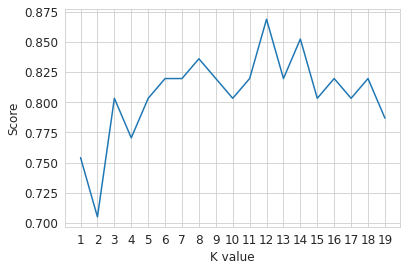

Maximum KNN Score is 86.89%


In [66]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, Y_train)
    scoreList.append(knn2.score(X_test, Y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

##SVM

In [51]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

acc = svm.score(X_test,Y_test)*100
accuracies['SVM'] = acc
print("SVM Test Accuracy: {:.2f}%".format(acc))

SVM Test Accuracy: 81.97%


##Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

acc = nb.score(X_test,Y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 81.97%


##Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

acc = dtc.score(X_test, Y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 73.77%


## Comparing Models

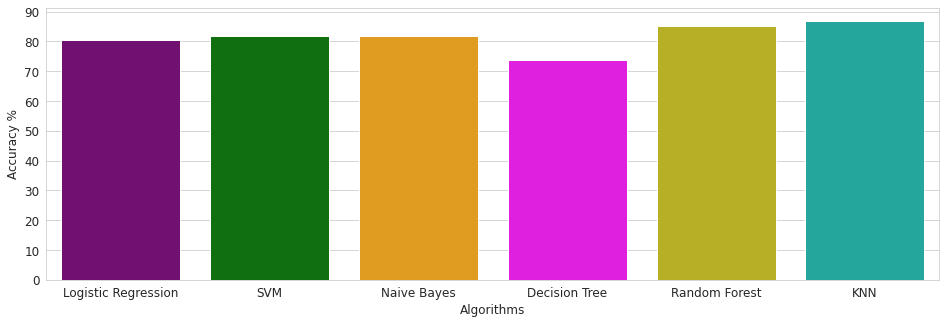

In [100]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Our models work fine but best of them are KNN 86.89% and Random Forest with 85.25% of accuracy. Let's look their confusion matrixes.

##Confusion Matrix

In [101]:
# Predicted values
y_head_lr = lr.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, Y_train)
y_head_knn = knn3.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_dtc = dtc.predict(X_test)
y_head_rf = rf.predict(X_test)

In [102]:
cm_lr = confusion_matrix(Y_test,y_head_lr)
cm_knn = confusion_matrix(Y_test,y_head_knn)
cm_svm = confusion_matrix(Y_test,y_head_svm)
cm_nb = confusion_matrix(Y_test,y_head_nb)
cm_dtc = confusion_matrix(Y_test,y_head_dtc)
cm_rf = confusion_matrix(Y_test,y_head_rf)

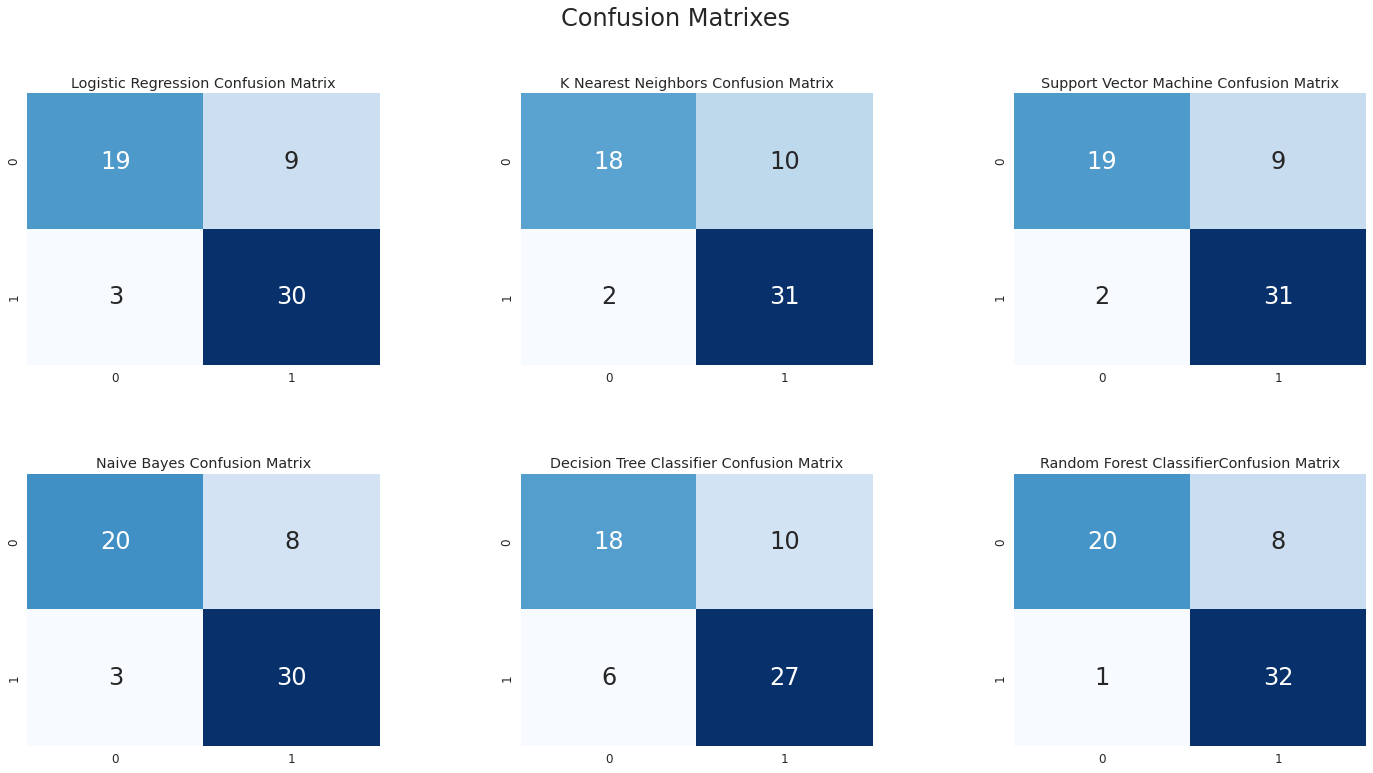

In [103]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest ClassifierConfusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()